<a href="https://colab.research.google.com/github/Grace02505/Semiconductors/blob/main/conductors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [19]:
path = "/content/drive/MyDrive/semiconductors.csv"
df = pd.read_csv(path)
df


,Unnamed: 0,year,process_size_nm,tdp_w,die_size_mm_2,transistors_million
0,0,2000.0,186.000000,39.161290,113.282609,30.045455
1,1,2001.0,147.537313,54.420000,118.621212,57.187970
2,2,2002.0,146.203704,61.957447,116.421569,50.537736
3,3,2003.0,136.648649,62.010000,144.075949,79.845304
4,4,2004.0,115.413534,70.500000,158.439655,113.565737
5,5,2005.0,100.341365,76.776596,159.909091,147.670940
6,6,2006.0,84.356061,65.301370,171.652174,241.991561
7,7,2007.0,77.246696,62.129730,160.869767,282.750000
8,8,2008.0,61.526316,83.089888,183.641221,446.961390
9,9,2009.0,49.155251,73.166667,181.226244,572.217195


In [20]:
df.shape

(23, 6)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           23 non-null     int64  
 1   year                 22 non-null     float64
 2   process_size_nm      23 non-null     float64
 3   tdp_w                23 non-null     float64
 4   die_size_mm_2        23 non-null     float64
 5   transistors_million  23 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.2 KB


Explore the missingness in the dataset for categorical and numerical data

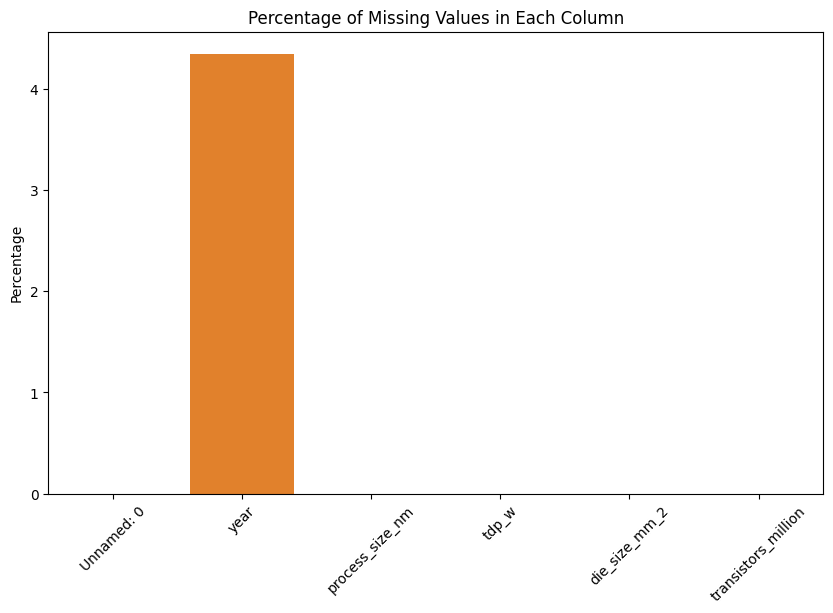

In [22]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Create a bar plot to visualize missing data
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.title("Percentage of Missing Values in Each Column")
plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.show()


Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach.

In [23]:
# Fill missing numerical values with mean
df.fillna(df.mean(), inplace=True)

# Fill missing categorical values with "Missing"
df.fillna({"year": "Missing"}, inplace=True)


In [24]:
print(df.isnull().sum())


Unnamed: 0             0
year                   0
process_size_nm        0
tdp_w                  0
die_size_mm_2          0
transistors_million    0
dtype: int64


Drop non-consequntial fields

In [25]:
#from io import StringIO
# Load the data into a DataFrame
#data = pd.read_csv(StringIO(df))

# Drop rows with missing values
df_cleaned = df.dropna()

# Display the cleaned DataFrame
print(df_cleaned)

    Unnamed: 0    year  process_size_nm       tdp_w  die_size_mm_2  \
0            0  2000.0       186.000000   39.161290     113.282609   
1            1  2001.0       147.537313   54.420000     118.621212   
2            2  2002.0       146.203704   61.957447     116.421569   
3            3  2003.0       136.648649   62.010000     144.075949   
4            4  2004.0       115.413534   70.500000     158.439655   
5            5  2005.0       100.341365   76.776596     159.909091   
6            6  2006.0        84.356061   65.301370     171.652174   
7            7  2007.0        77.246696   62.129730     160.869767   
8            8  2008.0        61.526316   83.089888     183.641221   
9            9  2009.0        49.155251   73.166667     181.226244   
10          10  2010.0        41.689655   65.897527     170.871528   
11          11  2011.0        36.478788   75.034700     200.670732   
12          12  2012.0        30.694864   71.161094     190.404908   
13          13  2013

Transform temporal data to their corrrect format (date time)

In [26]:
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')
print(df)

    Unnamed: 0       year  process_size_nm       tdp_w  die_size_mm_2  \
0            0 2000-01-01       186.000000   39.161290     113.282609   
1            1 2001-01-01       147.537313   54.420000     118.621212   
2            2 2002-01-01       146.203704   61.957447     116.421569   
3            3 2003-01-01       136.648649   62.010000     144.075949   
4            4 2004-01-01       115.413534   70.500000     158.439655   
5            5 2005-01-01       100.341365   76.776596     159.909091   
6            6 2006-01-01        84.356061   65.301370     171.652174   
7            7 2007-01-01        77.246696   62.129730     160.869767   
8            8 2008-01-01        61.526316   83.089888     183.641221   
9            9 2009-01-01        49.155251   73.166667     181.226244   
10          10 2010-01-01        41.689655   65.897527     170.871528   
11          11 2011-01-01        36.478788   75.034700     200.670732   
12          12 2012-01-01        30.694864   71.161

Perfom a full EDA and demonstrate the validity of the following assumptions

In [27]:
# Set up the figure and axes
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, "Moore's Law: Transistors vs Year")

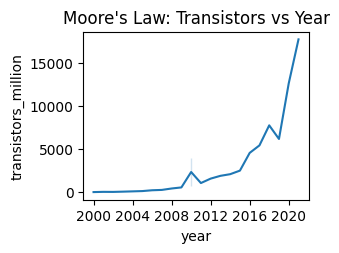

In [28]:
# Moore's Law
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='year', y='transistors_million')
plt.title("Moore's Law: Transistors vs Year")

Text(0.5, 1.0, 'Dannard Scaling: TDP vs Year')

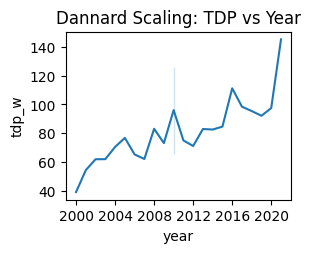

In [29]:
# Dannard Scaling
plt.subplot(2, 2, 2)
sns.lineplot(data=df, x='year', y='tdp_w')
plt.title("Dannard Scaling: TDP vs Year")


Text(0.5, 1.0, 'GPU Performance Improvement Factors')

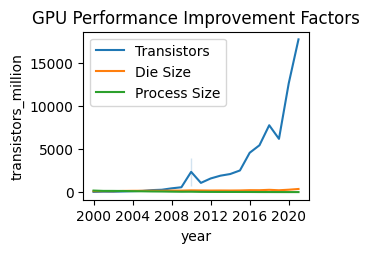

In [30]:
# GPU Performance Improvement
plt.subplot(2, 2, 3)
sns.lineplot(data=df, x='year', y='transistors_million', label='Transistors')
sns.lineplot(data=df, x='year', y='die_size_mm_2', label='Die Size')
sns.lineplot(data=df, x='year', y='process_size_nm', label='Process Size')
plt.title("GPU Performance Improvement Factors")


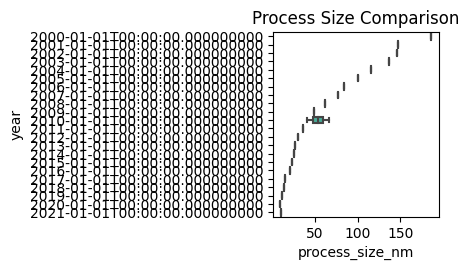

In [31]:
# Process Size Comparison
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='process_size_nm', y='year')
plt.title("Process Size Comparison")

plt.tight_layout()
plt.show()

Calculate and visualized the correlation among the features

<ipython-input-32-9d831ca3e6c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


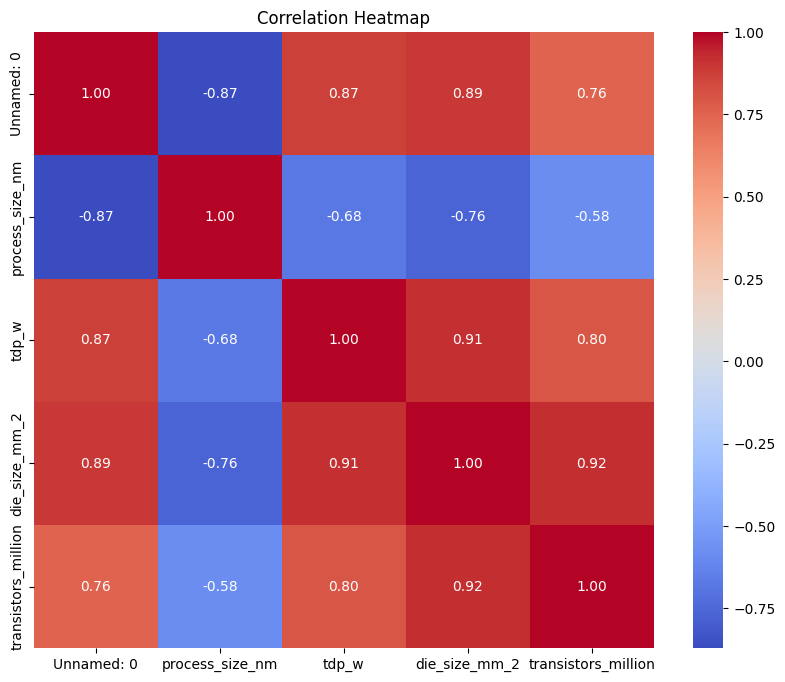

In [32]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Perfom the correct encoding for your data, in readiness for modelling.

In [33]:
data = pd.DataFrame(df)
print(data)

    Unnamed: 0       year  process_size_nm       tdp_w  die_size_mm_2  \
0            0 2000-01-01       186.000000   39.161290     113.282609   
1            1 2001-01-01       147.537313   54.420000     118.621212   
2            2 2002-01-01       146.203704   61.957447     116.421569   
3            3 2003-01-01       136.648649   62.010000     144.075949   
4            4 2004-01-01       115.413534   70.500000     158.439655   
5            5 2005-01-01       100.341365   76.776596     159.909091   
6            6 2006-01-01        84.356061   65.301370     171.652174   
7            7 2007-01-01        77.246696   62.129730     160.869767   
8            8 2008-01-01        61.526316   83.089888     183.641221   
9            9 2009-01-01        49.155251   73.166667     181.226244   
10          10 2010-01-01        41.689655   65.897527     170.871528   
11          11 2011-01-01        36.478788   75.034700     200.670732   
12          12 2012-01-01        30.694864   71.161